# Dimenstion Reduction, 차원 축소 

일반적으로 차원이 증가할수록 데이터 포이트 간이 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게됨.  
피처가 많을 경우, 상대적으로 적은 차원에서 학습된 모델 보다 예측 신뢰도가 떨어지고, 개별 피처 간의 상관관계가 높을 가능성이 큼.  
그로 인해 선형회귀 등의 모델에서는 다중공선성 문제가 발생하여 모델의 예측성능을 떨어질 수 있음. 

- Feature Selection 
    : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 방식 
- Feature Extraction 
    : 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 방식.  
    새롭게 추출된 중요 특성은 기존의 피터가 압축된 것임으로 기존의 피처와는 완전히 다른 값.  
    피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것. 
    이러한 함축적 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것.  
    
-> 차원 축소는 이를 통해 데이터를 좀 더 잘 설명하는 잠재적인 요소를 추출하는데 의미가 있음. 

- 이미지 데이터 변환     
    : 차원 축소는 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축된 형태의 이미지 변환과 압축을 수행할 수 있음.    
    변환된 이미지는 원본이미지보다 훨씬 작은 차원으로 Overfitting의 영향력이 작아져 오히려 예측성능을 끌어올릴 수 있음.    
- 텍스트 의미 도출    
    : 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱 (Semantic)의미나 토픽(Topic)을 잠재 요소로 간주하고 찾아냄.  


## PCA(Principal Component Analysis) 
여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법.   
PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨.   
( = 분산이 데이터의 특성을 가장 잘 나타낸다고 간주 )  


## LDA(Linear Discriminant Analysis), 선형 판별 분석법 
PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이나,    
지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소하는 게 중요한 차이.     
PCA는 입력 데이터의 큰 변동성을 찾았다면, LDA는 입력 데이터의 결정값 클래스를 최대한 분리할 수 있는 축을 찾음.  
클래스 간의 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소.  
즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식.   
클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유 벡터를 구하고 입력 데이터를 투영한다는 점.   

    1. 클래스 내부와 클래스 간 분산 행렬을 구함 <- 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터를 기반으로 구함. 
    2. 두 행렬을 고유 벡터로 분할 가능. 
    3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이요해 새로운 입력 데이터를 변환 


## SVD(Singular Value Decomposition), 특이값 분해
PCA는 정방행렬만을 고유벡터로 분해할 수 있지만 SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용이 가능.   
행렬 U와 V에 속한 벡터는 특이벡터(Singular Vector) 이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐.  
Truncated SVD 는 ∑ 의 대각 원소 중 상위 몇 개 만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것.  
 

# Iris 붓꽃 데이터 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

iris = load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns = columns)
irisDF['target'] = iris.target

In [11]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


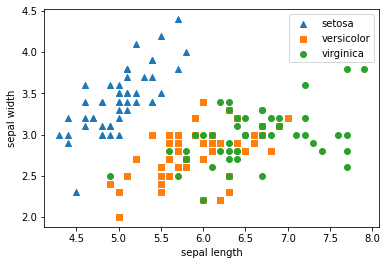

In [12]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker , label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## PCA

#### PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음.  -> PCA를 하기 전 동일한 스케일로 변환처리가 필요.

In [13]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 2)

In [17]:
pca.fit(iris_scaled)
iris_pca = pca.fit_transform(iris_scaled) # 변환 데이터 반환 
print(iris_pca.shape)

(150, 2)


In [22]:
irisDF_pca = pd.DataFrame(iris_pca, columns = ['pca_component_1', 'pca_component_2'])
irisDF_pca['target'] = iris.target

In [23]:
irisDF_pca

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


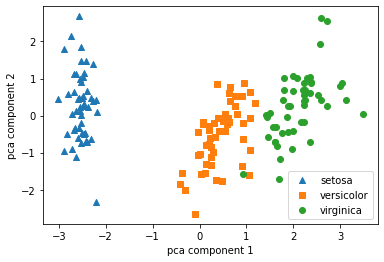

In [24]:
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i ]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i ]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.show()

`explained_variance_ratio_` 속성은 전체 변동성에서 개별 PCA 성분별로 차지하는 변동성을 비율을 제공 

In [26]:
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
scores

array([0.98, 0.94, 0.96])

In [32]:
irisDF_pca.iloc[:,:2]

,pca_component_1,pca_component_2
0,-2.576120,0.474499
1,-2.415322,-0.678092
2,-2.659333,-0.348282
3,-2.601991,-0.603306
4,-2.683744,0.640220
...,...,...
145,2.233024,0.389352
146,1.966862,-0.896264
147,1.928996,0.268890
148,1.806149,1.009217


In [33]:
pca_X = irisDF_pca.iloc[:,:2]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy' , cv = 3 )
scores_pca

array([0.98, 0.98, 1.  ])

## LDA 

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
iris_scaled = StandardScaler().fit_transform(iris.data)

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

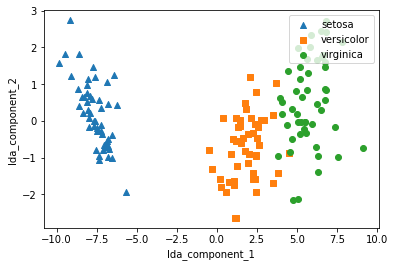

In [37]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## SVD

In [38]:
import numpy as np
from numpy.linalg import svd

In [39]:
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [40]:
U, Sigma, Vt = svd(a) # svd 반환 : U행렬, Sigma행렬, V전치 행렬 

In [41]:
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [46]:
print('U matrix : \n', np.round(U, 3))
print('\nSigma Value : \n', np.round(Sigma, 3))
print('\nV transpose matrix : \n', np.round(Vt, 3))

U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

Sigma Value : 
 [3.423 2.023 0.463 0.079]

V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]
